# Tutorial

### Instructions

In this tutorial, you will be creating a classifcation model. The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. Apply what you have learnt and come up with the optimal model to predict if a company goes bankrupt or not. 

Bonus: Determine what are the key features that influence your model. 

 PS: If you find a technique/method that you believe was not shared in class but useful; you can and should use it. No points will be deducted for trying! Do not delete your trial scripts, these will be important for you to understand where you improved from your previous attempts.



In [227]:
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np 


In [228]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score 
from sklearn.preprocessing import OneHotEncoder



In [229]:
data =pd.read_csv('datasets/data.csv')
data.shape

(6819, 96)

In [230]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


Linear Regression:

In [231]:
y = data['Bankrupt?']
x = data.drop(columns=['Bankrupt?'])

x_train, x_test, y_train, y_test = train_test_split(x,y)

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled  =scaler.transform(x_test) 

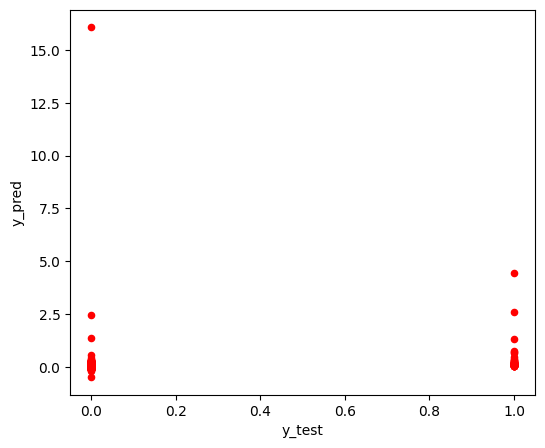


R2(Liner Regression) = -4.759
R2 (Ridge) = -4.759
R2(Lasso)= 0.140


In [232]:
model=LinearRegression()
model.fit(x_train_scaled, y_train)
y_pred  =model.predict(x_test_scaled)

plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, s=20, c='r')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

r2 = model.score(x_test_scaled, y_test)
print('\nR2(Liner Regression) = {: .3f}'.format(r2))

model = Ridge(alpha = 0.01)
model.fit(x_train_scaled, y_train)
print('R2 (Ridge) = {:.3f}'.format(r2))

model = Lasso(alpha = 0.01)
model.fit(x_train_scaled, y_train)
r2 = model.score(x_test_scaled, y_test)
print('R2(Lasso)= {:.3f}'.format(r2))

In [233]:
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, auc, confusion_matrix, f1_score,ConfusionMatrixDisplay, classification_report


Logistic Regression:

In [234]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [235]:
REG_CONST = 0.01

model = LogisticRegression(penalty='l2', C=1./REG_CONST, max_iter=300)
model.fit(x_train_scaled,y_train)

y_pred = model.predict(x_test_scaled)
acc = (y_pred == y_test).mean()
print('\nAcccuracy of test data = {:.3f}'.format(acc))


Acccuracy of test data = 0.970


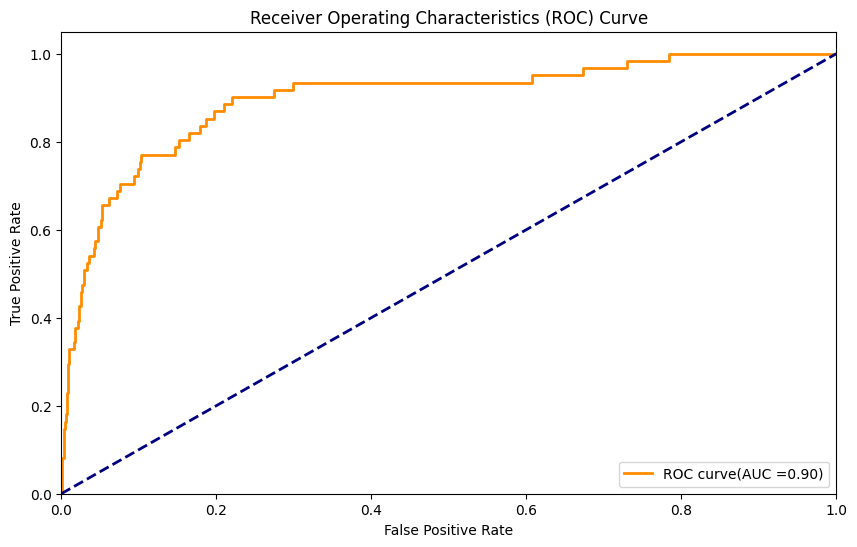

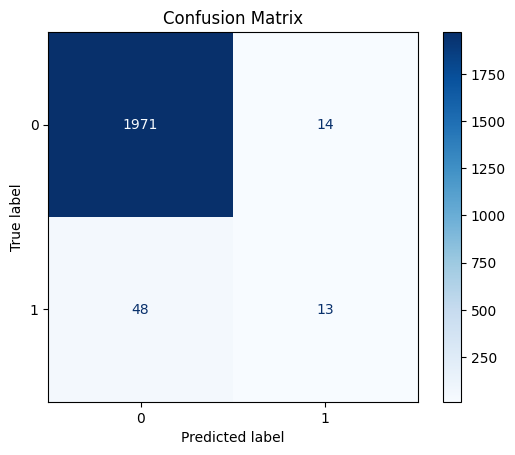


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1985
           1       0.48      0.21      0.30        61

    accuracy                           0.97      2046
   macro avg       0.73      0.60      0.64      2046
weighted avg       0.96      0.97      0.96      2046

F1 Score: 0.295


In [236]:
y_pred_prodba = model.predict_proba(x_test_scaled)[:,1]

fpr,tpr, _ = roc_curve(y_test, y_pred_prodba)
roc_auc = auc(fpr,tpr)

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr, color='darkorange', lw=2, label=f'ROC curve(AUC ={roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

cm =confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

f1 = f1_score(y_test, y_pred)

print("\nClassification Report:")
print(classification_report(y_test,y_pred))
print(f'F1 Score: {f1:.3f}')

F1 score - Balance btween precison and recall 
Model is very good at ppredicsting that the bank will not go bankrupt. 
But it sucks at pr


Multiclass Logistic Regression (DONT USE)

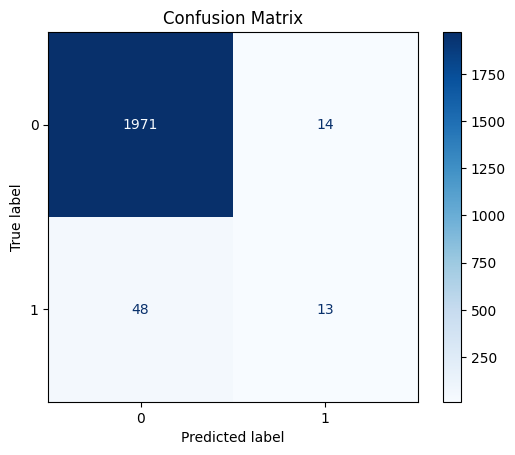

F1 Score: 0.964

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1985
           1       0.48      0.21      0.30        61

    accuracy                           0.97      2046
   macro avg       0.73      0.60      0.64      2046
weighted avg       0.96      0.97      0.96      2046



In [237]:
y_pred_prodba = model.predict_proba(x_test_scaled)[:,1]

cm = confusion_matrix (y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1:.3f}')

print("\nClassification Report:")
print(classification_report(y_test,y_pred))

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn import tree

In [239]:
data = pd.read_csv('datasets/data.csv')
data.shape

(6819, 96)

In [240]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [241]:
data.tail()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009
6818,0,0.493053,0.570105,0.549548,0.627409,0.627409,0.998080,0.801987,0.813800,0.313415,...,0.815956,0.000707,0.626680,0.627408,0.841019,0.275114,0.026793,0.565167,1,0.233902


In [242]:
data.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [243]:
data.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

In [244]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [245]:
data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [246]:
data.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

DecsionTreeClassifier: accuracy = 0.964


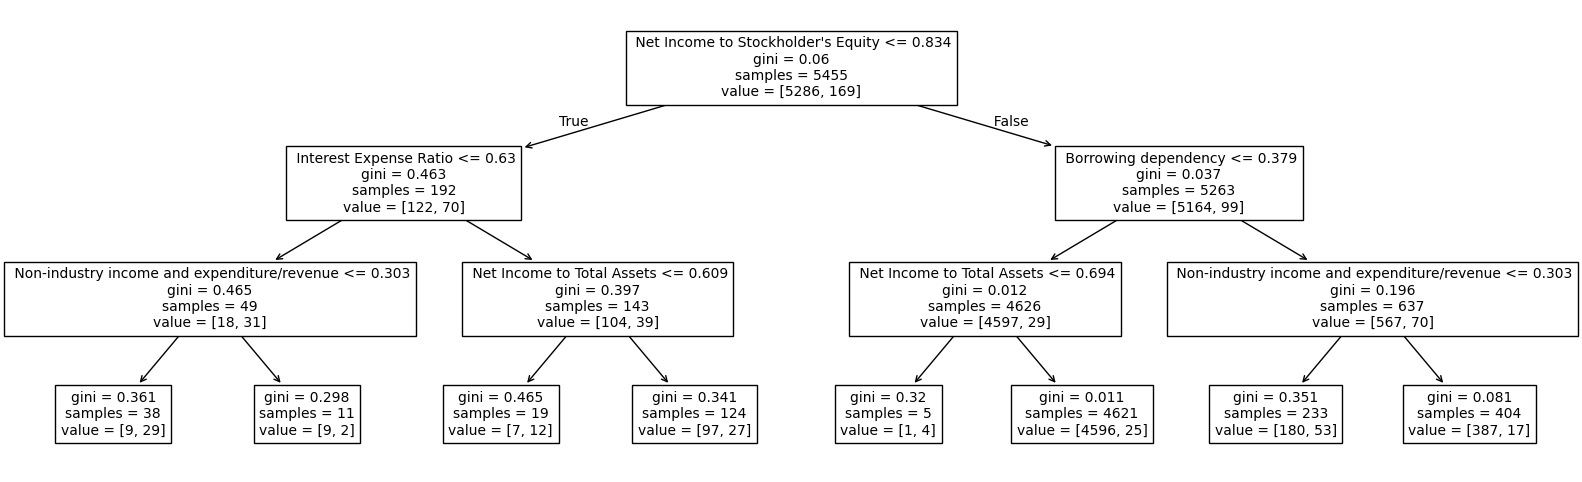

In [247]:
y = data['Bankrupt?']
x = data.drop('Bankrupt?', axis=1)
depth = 3

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

sk_model = DecisionTreeClassifier(max_depth=depth,
                                  random_state=1)
sk_model.fit(x_train, y_train)
sk_pred = sk_model.predict(x_test)
acc = (y_test == sk_pred).mean()
print('DecsionTreeClassifier: accuracy = {:.3f}'.format(acc))

feature_names = x.columns.tolist()
plt.figure(figsize = (20,6))
tree.plot_tree(sk_model,
               feature_names=feature_names,fontsize=10)
plt.show()


Feature Importance

Depth = 1, train_acc = 0.9677, eval_acc = 0.9638
Depth = 2, train_acc = 0.9711, eval_acc = 0.9589
Depth = 3, train_acc = 0.9730, eval_acc = 0.9570
Depth = 4, train_acc = 0.9757, eval_acc = 0.9599
Depth = 5, train_acc = 0.9801, eval_acc = 0.9570
Depth = 6, train_acc = 0.9839, eval_acc = 0.9531
Depth = 7, train_acc = 0.9872, eval_acc = 0.9531
Depth = 8, train_acc = 0.9899, eval_acc = 0.9462


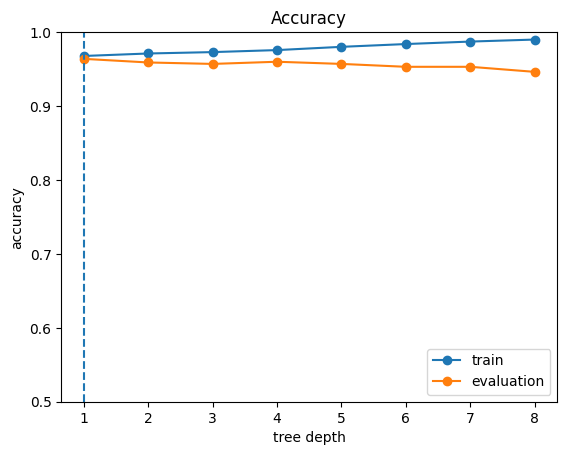

In [271]:
y = data['Bankrupt?']
x = data.drop('Bankrupt?', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

x_test, x_eval, y_test, y_eval = train_test_split(x_test,y_test, test_size = 0.5)

train_acc = []
eval_acc = []
max_depth = 8
for d in range(1, max_depth+1):
    model  =DecisionTreeClassifier(max_depth = d)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_train)
    train_acc.append((y_pred == y_train).mean())

    y_pred  = model.predict(x_eval)
    eval_acc.append((y_pred == y_eval).mean())
    print('Depth = {}, train_acc = {:.4f}, eval_acc = {:.4f}'\
          .format(d,train_acc[-1], eval_acc[-1]))
    
opt_depth = np.argmax(eval_acc) + 1

plt.plot(train_acc, marker='o', label='train')
plt.plot(eval_acc, marker='o', label='evaluation')
plt.legend()
plt.title('Accuracy')
plt.xlabel('tree depth')
plt.ylabel('accuracy')
plt.xticks(np.arange(max_depth), np.arange(1, max_depth + 1))
plt.axvline(x=opt_depth-1, ls='--')
plt.ylim(0.5,1.0)
plt.show()

Optimal depth = 1, test_acc = 0.9736


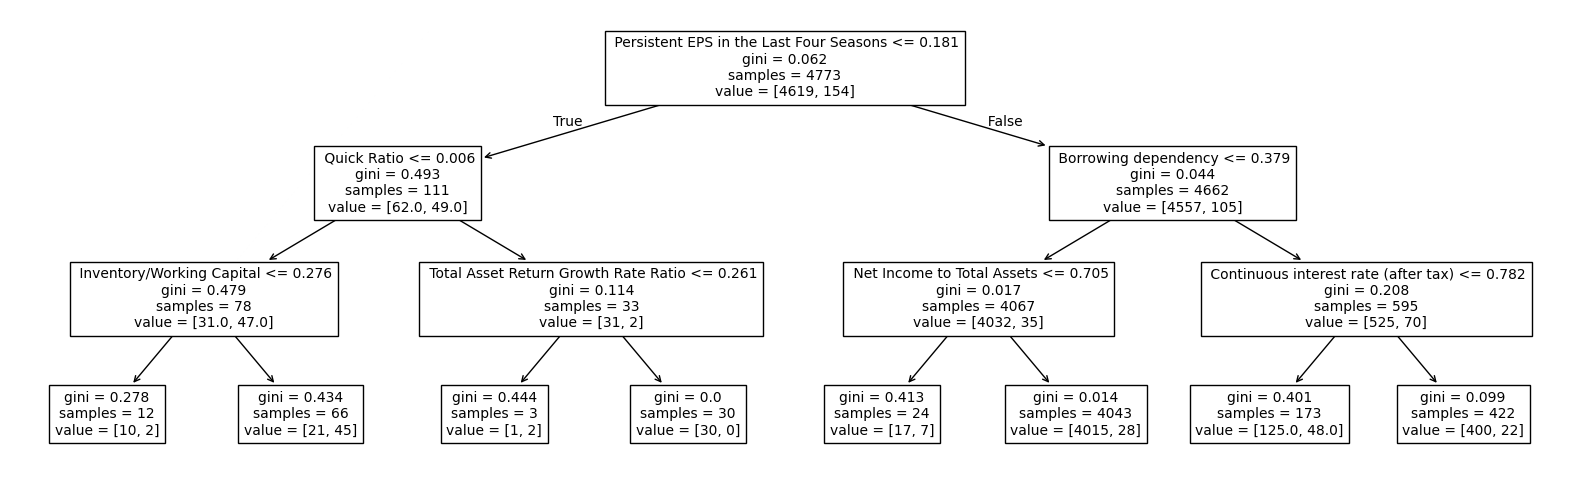

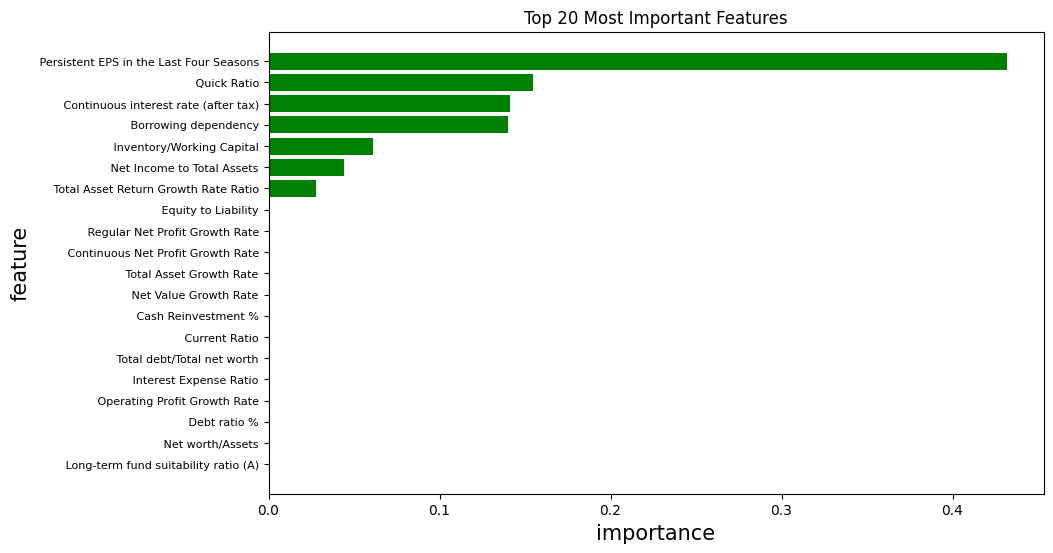

feature importance = [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.141 0.    0.
 0.    0.    0.    0.    0.    0.    0.432 0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.027 0.    0.    0.155 0.    0.
 0.    0.    0.    0.14  0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.061 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.044 0.    0.    0.    0.    0.    0.    0.    0.    0.   ]


In [273]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
test_acc = (y_pred == y_test).mean()
print('Optimal depth = {}, test_acc = {:.4f}'.format(opt_depth, test_acc))

feat_names = x.columns.tolist()
plt.figure(figsize=(20,6))
tree.plot_tree(model,feature_names=feat_names, fontsize=10)
plt.show()

feature_importance = model.feature_importances_
# Sort features by importance and get top 20
sorted_idx = np.argsort(feature_importance)
top_20_idx = sorted_idx[-20:]
top_20_importance = feature_importance[top_20_idx]
top_20_features = [feat_names[i] for i in top_20_idx]

plt.figure(figsize=(10,6))
plt.barh(np.arange(len(top_20_idx)), top_20_importance, align='center', color='green')
plt.yticks(np.arange(len(top_20_idx)), top_20_features, size=8)
plt.xlabel('importance', size=15)
plt.ylabel('feature', size=15)
plt.title('Top 20 Most Important Features')
plt.show()

print('feature importance = {}'.format(feature_importance.round(3)))

In [250]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


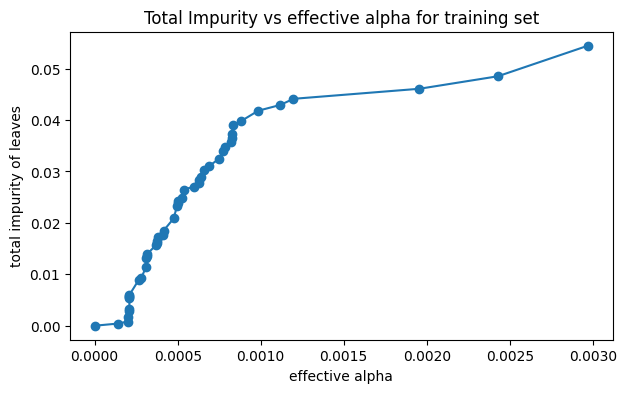

0) alpha = 0.0000 done.
1) alpha = 0.0001 done.
2) alpha = 0.0002 done.
3) alpha = 0.0002 done.
4) alpha = 0.0002 done.
5) alpha = 0.0002 done.
6) alpha = 0.0002 done.
7) alpha = 0.0002 done.
8) alpha = 0.0002 done.
9) alpha = 0.0002 done.
10) alpha = 0.0003 done.
11) alpha = 0.0003 done.
12) alpha = 0.0003 done.
13) alpha = 0.0003 done.
14) alpha = 0.0003 done.
15) alpha = 0.0003 done.
16) alpha = 0.0004 done.
17) alpha = 0.0004 done.
18) alpha = 0.0004 done.
19) alpha = 0.0004 done.
20) alpha = 0.0004 done.
21) alpha = 0.0004 done.
22) alpha = 0.0005 done.
23) alpha = 0.0005 done.
24) alpha = 0.0005 done.
25) alpha = 0.0005 done.
26) alpha = 0.0005 done.
27) alpha = 0.0005 done.
28) alpha = 0.0006 done.
29) alpha = 0.0006 done.
30) alpha = 0.0006 done.
31) alpha = 0.0006 done.
32) alpha = 0.0007 done.
33) alpha = 0.0007 done.
34) alpha = 0.0007 done.
35) alpha = 0.0008 done.
36) alpha = 0.0008 done.
37) alpha = 0.0008 done.
38) alpha = 0.0008 done.
39) alpha = 0.0008 done.
40) alpha 

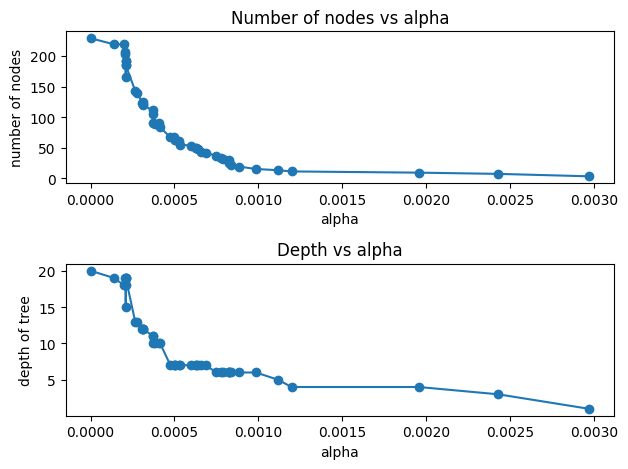

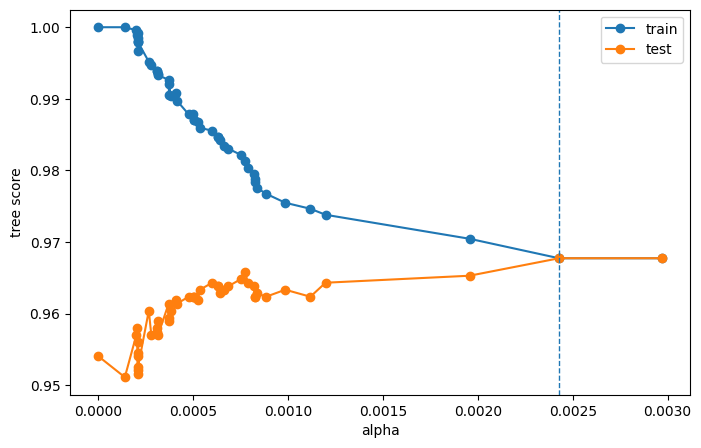

In [251]:
y = data['Bankrupt?']
x = data.drop('Bankrupt?', axis=1)

x_train,x_test, y_train, y_test = train_test_split(x, y,test_size = 0.3)

model = DecisionTreeClassifier()
path = model.cost_complexity_pruning_path(x_train, y_train)
ccp_alpha = path.ccp_alphas[:-1]
impurity = path.impurities[:-1]

plt.figure(figsize=(7,4))
plt.plot(ccp_alpha, impurity, marker= 'o')
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")
plt.title("Total Impurity vs effective alpha for training set")
plt.show()

models = []
for i, alpha in enumerate(ccp_alpha):
    model = DecisionTreeClassifier(ccp_alpha=alpha)
    model.fit(x_train, y_train)
    models.append(model)
    print('%d) alpha = %.4f done.' % (i,alpha))

node_counts = [model.tree_.node_count for model in models]
depth = [model.tree_.max_depth for model in models]

fig, ax = plt.subplots(2,1)
ax[0].plot(ccp_alpha, node_counts, marker="o")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alpha, depth, marker="o")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

train_score = [model.score(x_train, y_train) for model in models]
test_score = [model.score(x_test, y_test) for model in models]

i_max = np.argmax(test_score)
opt_alpha  =ccp_alpha[i_max]
opt_model = models[i_max]

plt.figure(figsize=(8,5))
plt.plot(ccp_alpha,train_score, marker= 'o', label='train')
plt.plot(ccp_alpha,test_score, marker="o", label='test')
plt.axvline(x=opt_alpha, ls="--", lw=1.0)
plt.legend()
plt.xlabel('alpha')
plt.ylabel('tree score')
plt.show 

print('Accuracy of test data = %.4f' % opt_model.score(x_test,y_test))
print('Optimal alpha = %.8f' % opt_alpha)


In [252]:
y = data['Bankrupt?']
x = data.drop('Bankrupt?', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

Accuracy of Model = 0.975


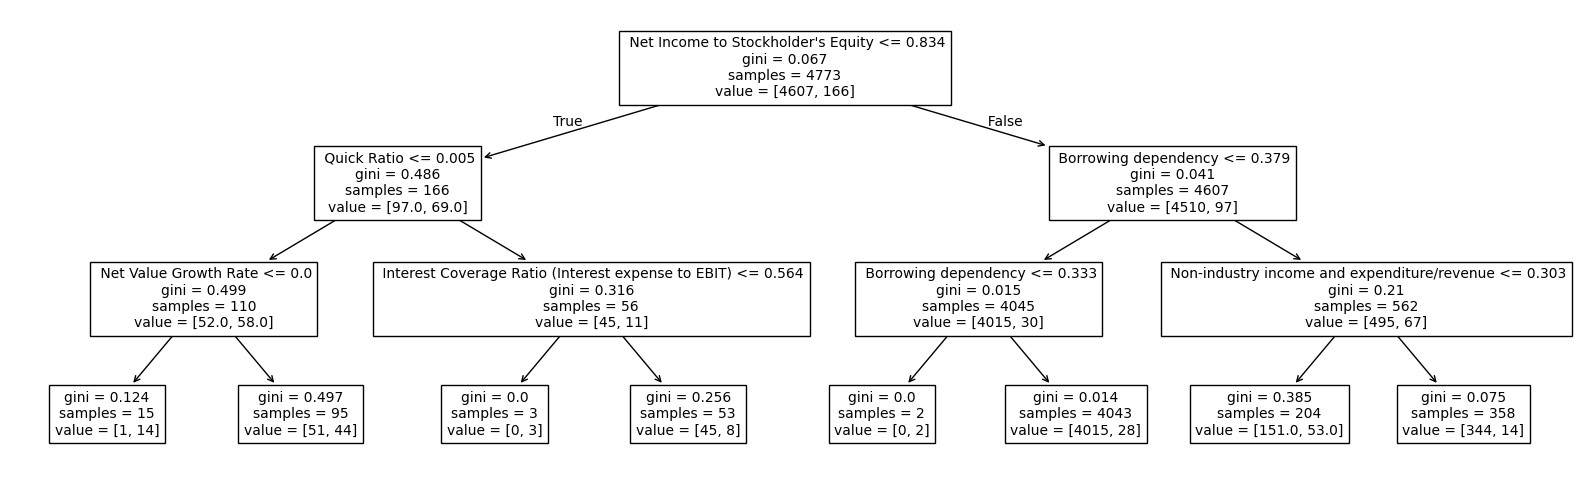

In [253]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = (y_test == y_pred).mean()
print('Accuracy of Model = {:.3f}'.format(accuracy))

feat_names = x.columns.tolist()
plt.figure(figsize=(20,6))
tree.plot_tree(model, feature_names = feat_names, fontsize=10)
plt.show()
